# LeNet

Epoch 1/12
1563/1563 [==============================] - 48s 30ms/step - loss: 1.6328 - accuracy: 0.4059 - val_loss: 1.4508 - val_accuracy: 0.4829
Epoch 2/12
1563/1563 [==============================] - 37s 24ms/step - loss: 1.3678 - accuracy: 0.5095 - val_loss: 1.3248 - val_accuracy: 0.5258
Epoch 3/12
1563/1563 [==============================] - 38s 24ms/step - loss: 1.2629 - accuracy: 0.5500 - val_loss: 1.2625 - val_accuracy: 0.5426
Epoch 4/12
1563/1563 [==============================] - 37s 24ms/step - loss: 1.1881 - accuracy: 0.5758 - val_loss: 1.2029 - val_accuracy: 0.5684
Epoch 5/12
1563/1563 [==============================] - 42s 27ms/step - loss: 1.1221 - accuracy: 0.6028 - val_loss: 1.1598 - val_accuracy: 0.5845
Epoch 6/12
1563/1563 [==============================] - 43s 28ms/step - loss: 1.0661 - accuracy: 0.6256 - val_loss: 1.1670 - val_accuracy: 0.5846
Epoch 7/12
1563/1563 [==============================] - 37s 24ms/step - loss: 1.0231 - accuracy: 0.6379 - val_loss: 1.1401 -

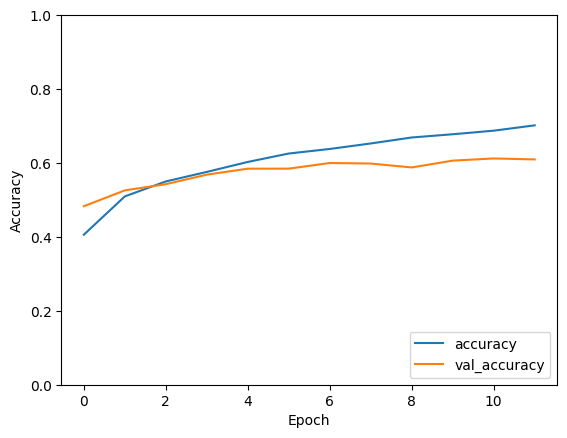

In [ ]:
### LeNet

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the input shape
input_shape=(32, 32, 3)

# Define the LeNet CNN architecture
model = models.Sequential()
model.add(layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
model.add(layers.AveragePooling2D())
model.add(layers.Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(layers.AveragePooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10))

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=12,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, accuracy_of_test = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', accuracy_of_test)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')


The LeNet Convolutional Neural Network (CNN) architecture is implemented using TensorFlow to classify images from the CIFAR-10 dataset. The CIFAR-10 dataset comprises 60,000 color images of size 32x32, distributed across 10 classes. The dataset is first loaded and normalized, with pixel values scaled to be between 0 and 1 for optimal neural network performance.
The LeNet architecture, a pioneering CNN model, is then defined. It consists of two convolutional layers, each followed by an average pooling layer. The first convolutional layer has six filters of size 5x5, and the second one has sixteen filters of the same size. These layers are designed to extract spatial hierarchies of features from the input images. After the convolutional and pooling layers, the network flattens the output and passes it through two fully connected layers with 120 and 84 neurons, respectively, to further process the features. The final layer is a dense layer with 10 neurons, corresponding to the 10 classes of the CIFAR-10 dataset, which outputs the classification probabilities.
The model is compiled using the Adam optimizer, a popular choice for training deep learning models due to its adaptive learning rate properties. The loss function used is Sparse Categorical Crossentropy, suitable for multi-class classification problems where each class is mutually exclusive.
The model is trained on the CIFAR-10 training dataset for 12 epochs, with the test set used as validation data to monitor the model's performance. After training, the model's accuracy is evaluated on the test set to determine its effectiveness in classifying unseen data.
Finally, the training and validation accuracies are plotted against epochs to visualize the model's learning progress. This plot helps in understanding how well the model is learning and generalizing over time, with an expected increase in accuracy as the number of epochs increases.


# AlexNet

Epoch 1/12
469/469 [==============================] - 204s 432ms/step - loss: 2.2965 - accuracy: 0.1244 - val_loss: 2.2780 - val_accuracy: 0.1147
Epoch 2/12
469/469 [==============================] - 201s 429ms/step - loss: 2.1885 - accuracy: 0.1798 - val_loss: 2.2385 - val_accuracy: 0.1690
Epoch 3/12
469/469 [==============================] - 204s 434ms/step - loss: 2.0530 - accuracy: 0.2313 - val_loss: 1.9624 - val_accuracy: 0.2763
Epoch 4/12
469/469 [==============================] - 202s 431ms/step - loss: 1.9540 - accuracy: 0.2714 - val_loss: 2.0135 - val_accuracy: 0.2617
Epoch 5/12
469/469 [==============================] - 211s 450ms/step - loss: 1.8627 - accuracy: 0.3076 - val_loss: 1.8321 - val_accuracy: 0.3473
Epoch 6/12
469/469 [==============================] - 200s 428ms/step - loss: 1.7653 - accuracy: 0.3462 - val_loss: 1.6837 - val_accuracy: 0.3850
Epoch 7/12
469/469 [==============================] - 203s 432ms/step - loss: 1.6959 - accuracy: 0.3731 - val_loss: 1.5928 -

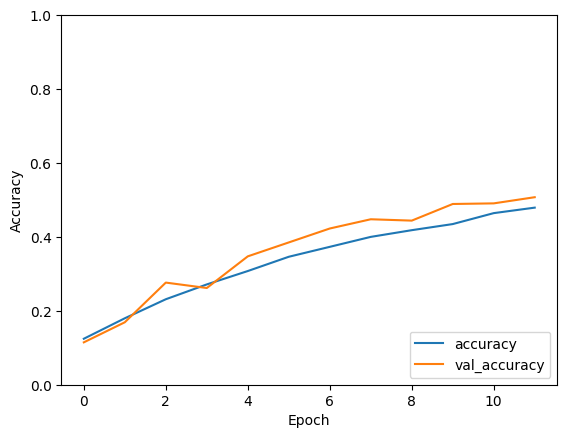

In [ ]:
### AlexNet

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

train_images = train_images[:15000]
test_images = test_images[:3000]
train_labels = train_labels[:15000]
test_labels = test_labels[:3000]

# Define the modified AlexNet architecture
model = models.Sequential()
model.add(layers.Conv2D(48, (3, 3), strides=(1, 1), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model.add(layers.Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model.add(layers.Conv2D(192, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(192, (3, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(2048, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2048, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model with SGD optimizer
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with epochs
history = model.fit(train_images, train_labels, epochs=12,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, accuracy_of_test = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', accuracy_of_test)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


The Alex Net Convolutional Neural Network (CNN) architecture is implemented using TensorFlow to classify images from the CIFAR-10 dataset. The CIFAR-10 dataset is loaded by importing TensorFlow. For this implementation, the dataset is first loaded and normalized, with pixel values scaled to be between 0 and 1. Additionally, the dataset is reduced to 15,000 training images and 3,000 test images to manage computational resources.
The AlexNet architecture, known for its success in the ImageNet challenge, is adapted to the smaller input size of the CIFAR-10 dataset. The network begins with a convolutional layer with 48 filters of size 3x3, followed by a max-pooling layer. This pattern is repeated with varying numbers of filters and kernel sizes, specifically 128 filters with 5x5 kernels, and three consecutive layers with 192, 192, and 128 filters, all with 3x3 kernels. Each convolutional layer is followed by a max-pooling layer to reduce spatial dimensions and increase computational efficiency.
After the convolutional and pooling layers, the network is flattened and passed through two fully connected layers, each with 2048 neurons. Dropout layers with a rate of 0.5 are applied after each fully connected layer to reduce overfitting by randomly setting a fraction of input units to zero during training.
The model is compiled with the Stochastic Gradient Descent (SGD) optimizer and the sparse categorical crossentropy loss function, suitable for multi-class classification tasks. It is trained for 12 epochs, with the test set used as validation data to monitor the model's performance.
After training, the model's accuracy is evaluated on the test set to determine its effectiveness in classifying unseen data. Finally, the training and validation accuracies are plotted against epochs to visualize the model's learning progress, which typically shows an increase in accuracy as the number of epochs increases. This visualization helps in understanding the model's performance and can guide further tuning and experimentation.


# DenseNet

29084464/29084464 [==============================] - 0s 0us/step
Epoch 1/12
1563/1563 [==============================] - 238s 145ms/step - loss: 1.5011 - accuracy: 0.4726 - val_loss: 1.1705 - val_accuracy: 0.5914
Epoch 2/12
1563/1563 [==============================] - 231s 148ms/step - loss: 1.2826 - accuracy: 0.5516 - val_loss: 1.1085 - val_accuracy: 0.6166
Epoch 3/12
1563/1563 [==============================] - 230s 147ms/step - loss: 1.2209 - accuracy: 0.5730 - val_loss: 1.0816 - val_accuracy: 0.6241
Epoch 4/12
1563/1563 [==============================] - 230s 147ms/step - loss: 1.1838 - accuracy: 0.5853 - val_loss: 1.0751 - val_accuracy: 0.6282
Epoch 5/12
1563/1563 [==============================] - 237s 151ms/step - loss: 1.1590 - accuracy: 0.5933 - val_loss: 1.0604 - val_accuracy: 0.6272
Epoch 6/12
1563/1563 [==============================] - 232s 149ms/step - loss: 1.1347 - accuracy: 0.6026 - val_loss: 1.0581 - val_accuracy: 0.6351
Epoch 7/12
1563/1563 [=========================

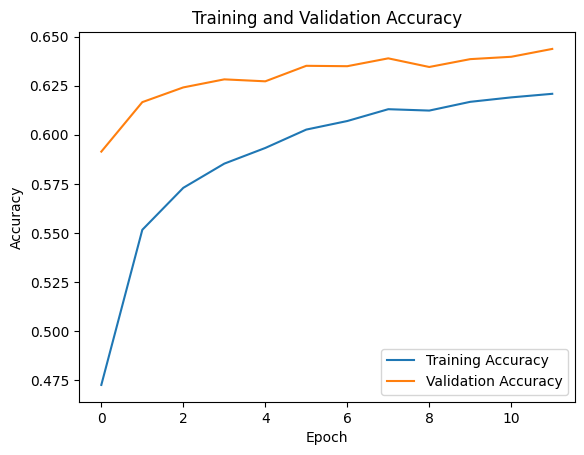

In [ ]:
### DenseNet

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications import DenseNet121
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the input shape
input_shape = (32, 32, 3)

# Load the pre-trained DenseNet121 model with a custom input shape
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the base model
base_model.trainable = False

# Add custom layers on top of the base model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=12,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_of_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_of_accuracy)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


The DenseNet121 Convolutional Neural Network (CNN) architecture is implemented using TensorFlow to classify images from the CIFAR-10 dataset. The CIFAR-10 dataset, is loaded and normalized, with pixel values scaled to be between 0 and 1.
The DenseNet121 architecture, known for its dense connectivity pattern, is utilized with pre-trained weights from the ImageNet dataset. In DenseNet, each layer is connected to every other layer in a feed-forward fashion, which leads to better feature propagation and reduces the number of parameters. The pre-trained DenseNet121 model is loaded with custom input shape matching the CIFAR-10 images and without the top classification layer, as it is specific to the ImageNet dataset.
The base DenseNet121 model is then frozen, meaning its weights will not be updated during training, to leverage the learned features from ImageNet. Custom layers are added on top of the base model to adapt it to the CIFAR-10 classification task. These include a Global Average Pooling layer to reduce the spatial dimensions, a fully connected layer with 128 neurons and ReLU activation for further feature processing, a Dropout layer with a rate of 0.5 to reduce overfitting, and a final Dense layer with 10 neurons and softmax activation to output the class probabilities.
The model is compiled with the Adam optimizer and sparse categorical crossentropy loss function, suitable for multi-class classification tasks. It is trained for 12 epochs, with the test set used as validation data to monitor the model's performance.
After training, the model's accuracy is evaluated on the test set to determine its effectiveness in classifying unseen data. Finally, the training and validation accuracies are plotted against epochs to visualize the model's learning progress, typically showing an increase in accuracy as the number of epochs increases. This visualization helps in understanding the model's performance and can guide further tuning and experimentation.



# Hyper parameter tuning for LeNet




In [ ]:
### Hyper parameter tuning for LeNet

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import ParameterGrid
import numpy as np

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0


# Defining input shape
input_shape=(32, 32, 3)

# Define the LeNet architecture
def create_model(learning_rate):
    model = models.Sequential()
    model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=input_shape))
    model.add(layers.AveragePooling2D())
    model.add(layers.Conv2D(16, (5, 5), activation='relu'))
    model.add(layers.AveragePooling2D())
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(84, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define the grid of hyperparameters to search
param_grid = {
    'learning_rate': [0.01],
    'batch_size': [32]
}

# Perform grid search
best_accuracy = 0
best_params = {}
for params in ParameterGrid(param_grid):
    print(f"Training with parameters: {params}")
    model = create_model(learning_rate=params['learning_rate'])
    history = model.fit(train_images, train_labels,
                        batch_size=params['batch_size'], epochs=12,
                        validation_data=(test_images, test_labels),
                        verbose=0)
    accuracy = max(history.history['val_accuracy'])
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params
    print(f"Validation accuracy: {accuracy}")

print(f"Best parameters: {best_params}")
print(f"Best validation accuracy: {best_accuracy}")


Training with parameters: {'batch_size': 32, 'learning_rate': 0.01}
Validation accuracy: 0.10029999911785126
Best parameters: {'batch_size': 32, 'learning_rate': 0.01}
Best validation accuracy: 0.10029999911785126


# Hyper parameter tuning for LeNet

Grid search is a method used to find the best combination of hyperparameters for a model. It involves training and evaluating the model for every combination of hyperparameters specified in a grid. the grid contains one value for the learning rate (0.01) and one value for the batch size (32), and the grid search is limited to a single set of parameters.

The learning rate is a hyperparameter that controls how much the model's weights are adjusted during training. A learning rate of 0.01 is used . The batch size specifies the number of samples that will be propagated through the network at once. A batch size of 32 is used here.

The model is trained for each combination of hyperparameters, and the validation accuracy is tracked. The best combination of hyperparameters is determined based on the highest validation accuracy achieved during training. In this case, since there is only one set of hyperparameters, the best parameters will be the learning rate of 0.01 and batch size of 32, with the best validation accuracy being the highest accuracy achieved during training with these parameters.








# Hyper parameter tuning for AlexNet




In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import ParameterGrid
import numpy as np

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images = train_images[:15000]
test_images = test_images[:3000]
train_labels = train_labels[:15000]
test_labels = test_labels[:3000]

train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the AlexNet-like model
def create_model(learning_rate):
    model = models.Sequential()
    model.add(layers.Conv2D(96, (3, 3), strides=(1, 1), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(256, (5, 5), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define the grid of hyperparameters to search
param_grid = {
    'learning_rate': [0.01],
    'batch_size': [32]
}

# Perform grid search
best_accuracy = 0
best_params = {}
for params in ParameterGrid(param_grid):
    print(f"Training with parameters: {params}")
    model = create_model(learning_rate=params['learning_rate'])
    history = model.fit(train_images, train_labels,
                        batch_size=params['batch_size'], epochs=12,
                        validation_data=(test_images, test_labels),
                        verbose=0)
    accuracy = max(history.history['val_accuracy'])
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params
    print(f"Validation accuracy: {accuracy}")

print(f"Best parameters: {best_params}")
print(f"Best validation accuracy: {best_accuracy}")


Training with parameters: {'batch_size': 32, 'learning_rate': 0.01}
Validation accuracy: 0.10599999874830246
Best parameters: {'batch_size': 32, 'learning_rate': 0.01}
Best validation accuracy: 0.10599999874830246



 Hyperparameter tuning for an AlexNet-like Convolutional Neural Network (CNN) model using grid search. Grid search is a method for finding the optimal combination of hyperparameters for a model. It involves training and evaluating the model for every combination of hyperparameters specified in a grid. In this code, the grid contains one value for the learning rate (0.01) and one value for the batch size (32).

The learning rate is a hyperparameter that controls how much the model's weights are adjusted during training. A learning rate of 0.01 is used. The batch size specifies the number of samples that will be propagated through the network at once, with a value of 32 used here.

The model is trained for each combination of hyperparameters, and the validation accuracy is tracked. The best combination of hyperparameters is determined based on the highest validation accuracy achieved during training. In this case, since there is only one set of hyperparameters, the best parameters will be the learning rate of 0.01 and batch size of 32, with the best validation accuracy being the highest accuracy achieved during training with these parameters.








# Hyper parameter tuning for DenseNet

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import ParameterGrid
import numpy as np

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images = train_images[:15000]
test_images = test_images[:3000]
train_labels = train_labels[:15000]
test_labels = test_labels[:3000]

train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the DenseNet model
def create_model(learning_rate):
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    base_model.trainable = False
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define the grid of hyperparameters to search
param_grid = {
    'learning_rate': [0.01],
    'batch_size': [32]
}

# Perform grid search
best_accuracy = 0
best_params = {}
for params in ParameterGrid(param_grid):
    print(f"Training with parameters: {params}")
    model = create_model(learning_rate=params['learning_rate'])
    history = model.fit(train_images, train_labels,
                        batch_size=params['batch_size'], epochs=12,
                        validation_data=(test_images, test_labels),
                        verbose=0)
    accuracy = max(history.history['val_accuracy'])
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params
    print(f"Validation accuracy: {accuracy}")

print(f"Best parameters: {best_params}")
print(f"Best validation accuracy: {best_accuracy}")


Training with parameters: {'batch_size': 32, 'learning_rate': 0.01}
Validation accuracy: 0.4636666774749756
Best parameters: {'batch_size': 32, 'learning_rate': 0.01}
Best validation accuracy: 0.4636666774749756


Grid search is employed to find the optimal combination of hyperparameters for the model. In this case, the hyperparameters being tuned are the learning rate and batch size. The grid consists of a single value for the learning rate (0.01) and a single value for the batch size (32). The model is trained for each combination of hyperparameters, and the validation accuracy is used to determine the best set of parameters.

# ResNet50

In [ ]:


import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications import ResNet50
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images = train_images[:15000]
test_images = test_images[:3000]
train_labels = train_labels[:15000]
test_labels = test_labels[:3000]

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the input shape
input_shape = (32, 32, 3)

# Load the pre-trained ResNet50 model with a custom input shape
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the base model
base_model.trainable = False

# Add custom layers on top of the base model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=12,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_of_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_of_accuracy)



Epoch 1/12
469/469 [==============================] - 95s 193ms/step - loss: 2.3274 - accuracy: 0.1015 - val_loss: 2.3024 - val_accuracy: 0.1060
Epoch 2/12
469/469 [==============================] - 89s 191ms/step - loss: 2.3027 - accuracy: 0.1007 - val_loss: 2.3024 - val_accuracy: 0.1060
Epoch 3/12
469/469 [==============================] - 89s 190ms/step - loss: 2.3026 - accuracy: 0.1018 - val_loss: 2.3022 - val_accuracy: 0.1063
Epoch 4/12
469/469 [==============================] - 90s 192ms/step - loss: 2.3026 - accuracy: 0.1007 - val_loss: 2.3024 - val_accuracy: 0.1060
Epoch 5/12
469/469 [==============================] - 90s 192ms/step - loss: 2.3026 - accuracy: 0.1020 - val_loss: 2.3024 - val_accuracy: 0.1023
Epoch 6/12
469/469 [==============================] - 90s 192ms/step - loss: 2.3026 - accuracy: 0.1035 - val_loss: 2.3023 - val_accuracy: 0.1060
Epoch 7/12
469/469 [==============================] - 94s 200ms/step - loss: 2.3025 - accuracy: 0.1025 - val_loss: 2.3023 - val_ac

The ResNet50 model is loaded with pre-trained weights from the ImageNet dataset, and its top layers are excluded to allow for the addition of custom layers tailored to the CIFAR-10 classification task. The base model's layers are frozen to prevent their weights from being updated during training, preserving the learned features from ImageNet.

Custom layers are added on top of the base model, including a global average pooling layer, a dense layer with 128 neurons and ReLU activation, a dropout layer with a 50% dropout rate to reduce overfitting, and a final dense layer with 10 neurons and softmax activation for classifying the images into 10 classes.

The model is compiled using the Adam optimizer and sparse categorical crossentropy loss function, which are common choices for classification tasks. It is then trained for 12 epochs using the training dataset, with the test dataset used for validation. After training, the model's performance is evaluated on the test dataset, and the test accuracy is reported, indicating the model's ability to classify unseen images from the CIFAR-10 dataset correctly.

# Hyper parameter tuning for ResNet50

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import ParameterGrid
import numpy as np

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images = train_images[:15000]
test_images = test_images[:3000]
train_labels = train_labels[:15000]
test_labels = test_labels[:3000]


train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the ResNet50 model
def create_model(learning_rate):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    base_model.trainable = False
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define the grid of hyperparameters to search
param_grid = {
    'learning_rate': [0.01],
    'batch_size': [32]
}

# Perform grid search
best_accuracy = 0
best_params = {}
for params in ParameterGrid(param_grid):
    print(f"Training with parameters: {params}")
    model = create_model(learning_rate=params['learning_rate'])
    history = model.fit(train_images, train_labels,
                        batch_size=params['batch_size'], epochs=12,
                        validation_data=(test_images, test_labels),
                        verbose=0)
    accuracy = max(history.history['val_accuracy'])
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params
    print(f"Validation accuracy: {accuracy}")

print(f"Best parameters: {best_params}")
print(f"Best validation accuracy: {best_accuracy}")


Training with parameters: {'batch_size': 32, 'learning_rate': 0.01}
Validation accuracy: 0.10599999874830246
Best parameters: {'batch_size': 32, 'learning_rate': 0.01}
Best validation accuracy: 0.10599999874830246


Grid search is employed to find the optimal combination of hyperparameters for the model. It involves training and evaluating the model for each set of hyperparameters specified in a predefined grid. In this case, the grid contains only one value for the learning rate (0.01) and one value for the batch size (32).

ChatGPT Link : https://chat.openai.com/share/996074d9-0d22-4631-97fb-2339de6fd2ce